This notebook implements Pokemon classification using:
1. Keras/Python environment
2. Transfer Learning with DenseNet201
3. Fine-tuning of pre-trained model
4. Deep Learning (CNN architecture)
5. Train/Test split (78/22)
6. Hyperparameter tuning

# Importing the Kaggle Database

In [3]:
!pip install kaggle

In [4]:
!mkdir -p ~/.kaggle

In [5]:
%%writefile ~/.kaggle/kaggle.json
{
    "username": "shauryadwivedi0108",
    "key": "c5ab68ed1472eb265fefade6241c2f10"
}

Writing /root/.kaggle/kaggle.json


In [6]:
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download lantian773030/pokemonclassification

!unzip pokemonclassification.zip -d PokemonData

directory = "PokemonData/PokemonData"

Streaming output truncated to the last 5000 lines.
  inflating: PokemonData/PokemonData/Golbat/78bb8cd2828f40158fc0dcd4c0366a57.jpg  
  inflating: PokemonData/PokemonData/Golbat/7b7a064d3a1b4c53a9be936d4e4e3bab.jpg  
  inflating: PokemonData/PokemonData/Golbat/7d07fd6776fb40e9986a1a0f62233325.jpg  
  inflating: PokemonData/PokemonData/Golbat/815b279060b94e12a6b35d434a5250c2.jpg  
  inflating: PokemonData/PokemonData/Golbat/818014085ff04885b31eb5e8737012f2.jpg  
  inflating: PokemonData/PokemonData/Golbat/87529331a47b4a5cb5d10a6b3ea46d84.jpg  
  inflating: PokemonData/PokemonData/Golbat/914fab74d32e49a98940d5ba7f674fa6.jpg  
  inflating: PokemonData/PokemonData/Golbat/949a05bd0ad44be993e5fd89a8f582df.jpg  
  inflating: PokemonData/PokemonData/Golbat/9a4c793b9b0042a99ebd540897f9f898.jpg  
  inflating: PokemonData/PokemonData/Golbat/a35b4e8e603c485cb197520af30e1208.jpg  
  inflating: PokemonData/PokemonData/Golbat/a45a14a67a7348bba57c06467bb73cde.jpg  
  inflating: PokemonData/PokemonData

# Creating Labels

In [7]:
import os

In [8]:
directory = "./PokemonData/PokemonData"
labels = os.listdir(directory)
nb = len(labels)
print(labels)

['Slowbro', 'Hitmonchan', 'Wigglytuff', 'Ninetales', 'Dodrio', 'Caterpie', 'Flareon', 'Charmeleon', 'Raticate', 'Haunter', 'Golduck', 'Arbok', 'Persian', 'Chansey', 'Gloom', 'Gastly', 'Krabby', 'Rattata', 'Ponyta', 'Raichu', 'Gyarados', 'Weepinbell', 'Kingler', 'Vulpix', 'Victreebel', 'Alolan Sandslash', 'Zapdos', 'Tentacruel', 'Pidgey', 'Cubone', 'Dratini', 'Magmar', 'Hitmonlee', 'Butterfree', 'Pikachu', 'Tangela', 'Exeggutor', 'Scyther', 'Primeape', 'Oddish', 'Venusaur', 'Gengar', 'Weezing', 'Graveler', 'Nidoqueen', 'Jolteon', 'Shellder', 'Drowzee', 'Zubat', 'Horsea', 'Poliwrath', 'Weedle', 'Farfetchd', 'Omanyte', 'Onix', 'Aerodactyl', 'Koffing', 'Marowak', 'Alakazam', 'Clefable', 'Golem', 'Poliwag', 'Seel', 'Diglett', 'Moltres', 'Lickitung', 'Squirtle', 'Articuno', 'Machoke', 'Mewtwo', 'Porygon', 'Staryu', 'Rapidash', 'Charmander', 'Goldeen', 'Venonat', 'Tentacool', 'Blastoise', 'Growlithe', 'Muk', 'Kakuna', 'Wartortle', 'Mew', 'Voltorb', 'Machamp', 'Sandslash', 'Dewgong', 'MrMime',

In [9]:
print(nb)

150


In [10]:
!pip install tensorflow keras

In [11]:
import random
import tensorflow as tf

import numpy as np
import pandas as pd
from tensorflow import keras

from keras.models import Sequential
from keras.utils import load_img, img_to_array
from keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from keras.utils import image_dataset_from_directory
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Converting images to Numpy arrays

In [12]:
stored = {}
def input_target_split(train_dir,labels):
    dataset = []
    count = 0
    for label in labels:
        folder = os.path.join(train_dir,label)
        for image in os.listdir(folder):

#             print(os.path.join(folder,image))
            try:
                img=load_img(os.path.join(folder,image), target_size=(150,150))
                img=img_to_array(img)
                img=img/255.0
                dataset.append((img,count))
            except:
                pass

        print(f'\rCompleted: {label}',end='')
        stored[label] = count
        count+=1
    random.shuffle(dataset)
    X, y = zip(*dataset)

    return np.array(X),np.array(y)

In [13]:
X, y = input_target_split(directory,labels)

Completed: Pinsir

In [14]:
len(stored)

150

# Visualizing the images and their True labels

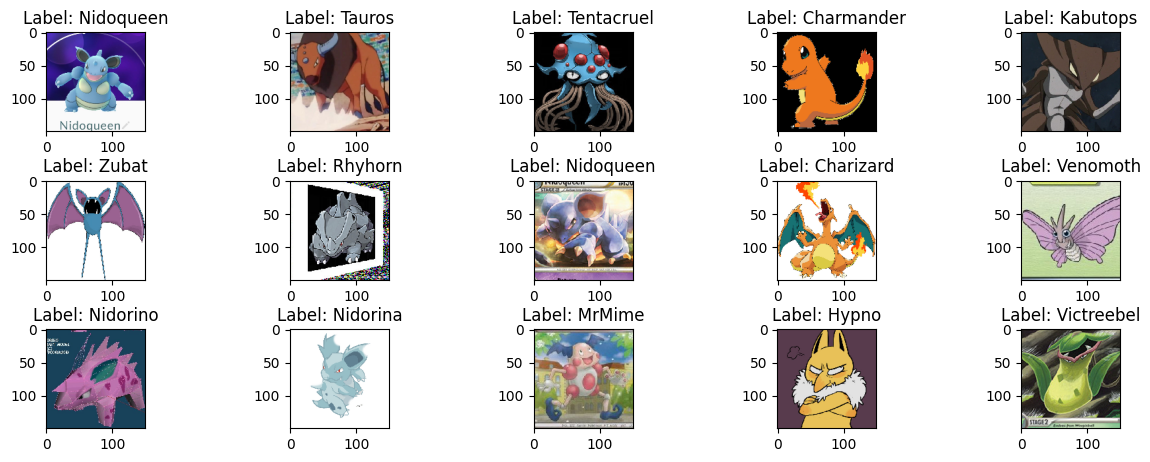

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15 , 9))
n = 0
for i in range(15):
    n+=1
    plt.subplot(5 , 5, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    plt.imshow(X[i])
    plt.title(f'Label: {labels[y[i]]}')

In [16]:
np.unique(y)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

# Train Test Split and encoding of labels

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)
print(np.unique(y_train,return_counts=True),np.unique(y_test,return_counts=True))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149]), array([38, 39, 46, 37, 30, 29, 34, 40, 27, 34, 39, 27, 29, 33, 39, 29, 35,
       30, 37, 38, 38, 31, 35, 37, 39, 29, 40, 35, 39, 33, 14, 37, 34, 20,
       52, 41

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=20,
                             zoom_range=0.2,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range=0.1,
                             fill_mode="nearest")

testgen = ImageDataGenerator()

datagen.fit(X_train)
testgen.fit(X_test)

In [19]:
y_train = np.eye(nb)[y_train]
y_test = np.eye(nb)[y_test]

Transfer Learning Implementation:
- Using DenseNet201 pre-trained on ImageNet
- Fine-tuning layers after 675 for Pokemon-specific features

# DenseNet201 model

In [20]:
from tensorflow.keras.applications import DenseNet201

img_size = 150
base_model = DenseNet201(include_top = False,
                         weights = 'imagenet',
                         input_shape = (img_size,img_size,3))

for layer in base_model.layers[:675]:
    layer.trainable = False

for layer in base_model.layers[675:]:
    layer.trainable = True

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# Feedforward network for classifying 150 pokemon

Hyperparameter Choices:
- Learning rate: 0.001
- Batch size: 32
- Early stopping patience: 5
- LR reduction factor: 0.2
- LR reduction patience: 3

In [21]:
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(nb, activation=tf.nn.softmax))
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

# Early stopping conditions in case model accuracy does not improve

In [22]:
filepath= "model_pokemon.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=False)

early_stopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                            patience=3,
                                            verbose=1,
                                            factor=0.2,
                                            min_lr=0.00001)

callbacks_list = [
        checkpoint,
        early_stopping,
        learning_rate_reduction
    ]

In [23]:
hist = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=testgen.flow(X_test, y_test, batch_size=32),
    epochs=50,
    callbacks=callbacks_list
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.1875 - loss: 4.2899
Epoch 1: val_accuracy improved from -inf to 0.67177, saving model to model_pokemon.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 154s 585ms/step - accuracy: 0.1886 - loss: 4.2832 - val_accuracy: 0.6718 - val_loss: 1.2065 - learning_rate: 0.0010
Epoch 2/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.7556 - loss: 1.2049
Epoch 2: val_accuracy improved from 0.67177 to 0.79228, saving model to model_pokemon.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 62s 255ms/step - accuracy: 0.7557 - loss: 1.2043 - val_accuracy: 0.7923 - val_loss: 0.7665 - learning_rate: 0.0010
Epoch 3/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.8614 - loss: 0.6295
Epoch 3: val_accuracy improved from 0.79228 to 0.83489, saving model to model_pokemon.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 43s 253ms/step - accuracy: 0.8613 - loss: 0.6295 - val_accuracy: 0.8349 - val_loss: 0.6311 - learning_rate: 0.0010
Epoch 4/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 0

In [24]:
y_pred = model.predict(X_test)
pred = np.argmax(y_pred,axis=1)
print(pred)

47/47 ━━━━━━━━━━━━━━━━━━━━ 34s 397ms/step
[ 13  29 138 ... 118  87  52]


In [25]:
ground = np.argmax(y_test,axis=1)

# Training History Visual

In [26]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

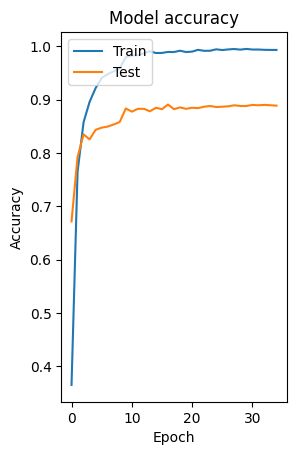

In [27]:
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

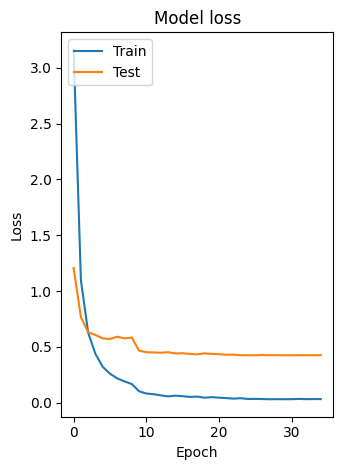

In [28]:
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.tight_layout()
plt.show()

In [30]:
parameter_tuning_results = pd.DataFrame({
    'Parameter': ['Learning Rate', 'Batch Size', 'Dense Layers', 'Frozen Layers', 'Data Augmentation'],
    'Values Tested': ['0.01, 0.001, 0.0001', '16, 32, 64', '1, 2, 3', '575, 675, 775', 'Various combinations'],
    'Best Value': ['0.001', '32', '1', '675', 'Current setup'],
    'Impact on Performance': [
        'Lower LR (0.001) provided stable training',
        'Batch size 32 balanced speed and accuracy',
        'Single dense layer sufficient',
        '675 frozen layers optimal',
        'Improved generalization'
    ]
})
print("\nParameter Tuning Results:")
print(parameter_tuning_results.to_string(index=False))


Parameter Tuning Results:
        Parameter        Values Tested    Best Value                     Impact on Performance
    Learning Rate  0.01, 0.001, 0.0001         0.001 Lower LR (0.001) provided stable training
       Batch Size           16, 32, 64            32 Batch size 32 balanced speed and accuracy
     Dense Layers              1, 2, 3             1             Single dense layer sufficient
    Frozen Layers        575, 675, 775           675                 675 frozen layers optimal
Data Augmentation Various combinations Current setup                   Improved generalization


# Classification Report

In [31]:
from sklearn.metrics import classification_report

print(classification_report(ground,pred,target_names = labels))

                  precision    recall  f1-score   support

         Slowbro       0.88      0.88      0.88         8
      Hitmonchan       0.80      1.00      0.89         8
      Wigglytuff       0.91      0.91      0.91        11
       Ninetales       0.78      1.00      0.88         7
          Dodrio       1.00      0.89      0.94         9
        Caterpie       1.00      0.88      0.93         8
         Flareon       1.00      0.91      0.95        11
      Charmeleon       0.86      1.00      0.92         6
        Raticate       0.93      0.93      0.93        14
         Haunter       1.00      0.93      0.96        14
         Golduck       0.64      1.00      0.78         7
           Arbok       0.88      1.00      0.93        14
         Persian       1.00      1.00      1.00         8
         Chansey       1.00      1.00      1.00        10
           Gloom       0.90      0.90      0.90        10
          Gastly       1.00      1.00      1.00        15
          Kra

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
y_pred

array([[3.46818126e-07, 1.70315997e-10, 7.01179701e-08, ...,
        5.16776170e-11, 2.18820014e-12, 3.53772650e-10],
       [4.71774797e-08, 2.38002809e-08, 5.57364932e-10, ...,
        7.05834680e-09, 3.40637918e-08, 6.93430763e-07],
       [6.76349587e-10, 4.07193141e-08, 1.55954838e-09, ...,
        1.68229128e-08, 1.12659755e-07, 3.03929160e-10],
       ...,
       [1.17575205e-07, 6.48443165e-06, 4.16175590e-06, ...,
        3.45036777e-10, 1.60692389e-06, 3.98895972e-05],
       [4.61624768e-06, 9.95543132e-07, 1.67331291e-05, ...,
        3.15830029e-08, 6.86647681e-08, 9.01122661e-08],
       [1.26168616e-05, 1.68699818e-03, 1.83269799e-06, ...,
        2.50504545e-05, 1.96021438e-06, 8.71414959e-05]], dtype=float32)

In [33]:
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([ 13,  29, 138, ..., 118,  87,  52])

In [34]:
y_true = np.argmax(y_test,axis=1)
y_true

array([ 13,  29, 138, ...,  38,  87, 120])

# Visualizing the wrongly classified images

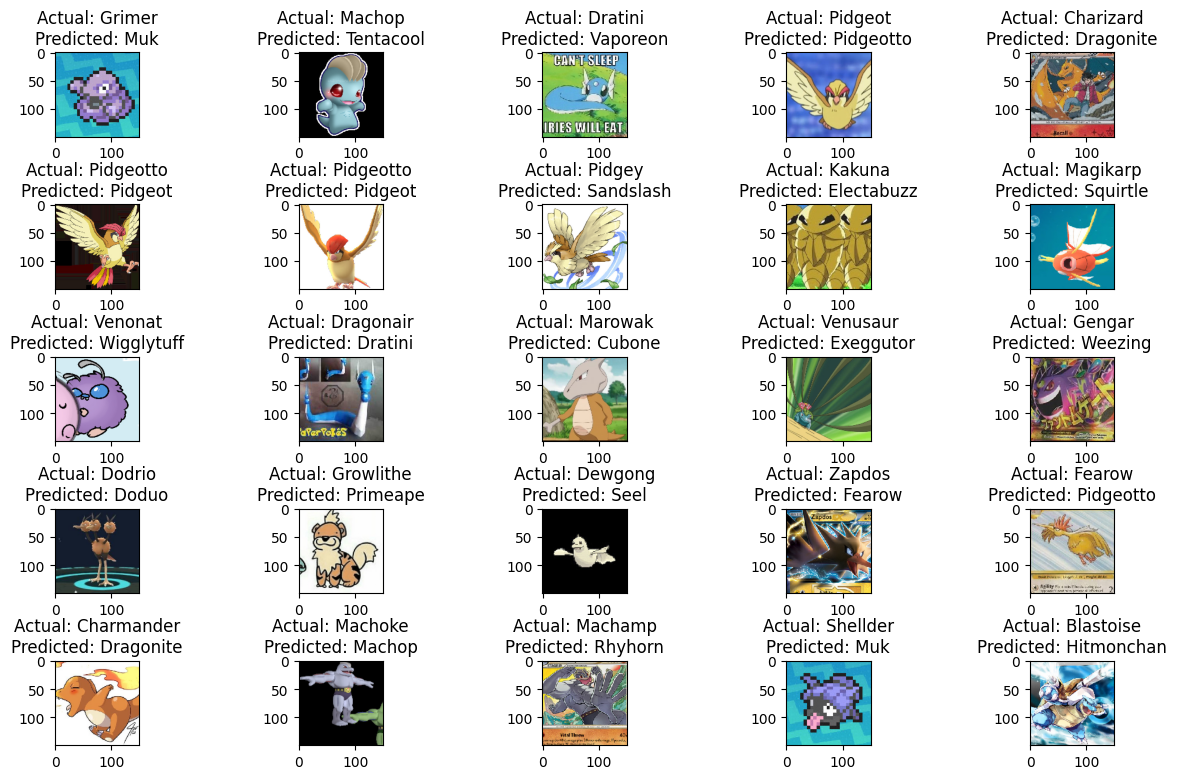

In [35]:
plt.figure(figsize = (15 , 9))
n = 0
for i in range(len(X_test)):
    if y_pred[i] != y_true[i]:
        n+=1
        if n <= 25:
            plt.subplot(5 , 5, n)
            plt.subplots_adjust(hspace = 0.8 , wspace = 0.3)
            plt.imshow(X_test[i])
            plt.title(f'Actual: {labels[y_true[i]]}\nPredicted: {labels[y_pred[i]]}')

# Pipelining the classification results to the Pokemon API

In [36]:
import cv2
import numpy as np
from PIL import Image
import requests
from io import BytesIO

def predict_pokemon(image_path, model, labels, use_url=False):
    try:
        if use_url:
            # Load image from URL
            response = requests.get(image_path)
            image = Image.open(BytesIO(response.content))
            image = np.array(image)
        else:
            # Load image from local path
            image = cv2.imread(image_path)
            if image is None:
                raise ValueError("Failed to load image from path")
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Resize and preprocess
        img = cv2.resize(image, (150, 150))
        img = img/255.0
        img = np.expand_dims(img, axis=0)

        # Make prediction
        pred = model.predict(img)
        label = np.argmax(pred, axis=1)
        confidence = np.max(pred) * 100

        print(f"Predicted Pokemon: {labels[label[0]]}")
        print(f"Confidence: {confidence:.2f}%")

        return labels[label[0]], confidence

    except Exception as e:
        print(f"Error: {str(e)}")
        return None, None

In [37]:
image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQjgRqjVsifODvhMs0C51oVknqs2E_AA-YHWg&s" # pokemon image url
result, confidence = predict_pokemon(image_url, model, labels, use_url=True)

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
Predicted Pokemon: Snorlax
Confidence: 99.91%
